# Importing Libraries


In [35]:
import pandas as pd

In [2]:
from textblob import TextBlob
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Loading Dataset

In [2]:
# Load the dataset containing Cricket Tweets
df = pd.read_csv('cricket_tweets.csv.zip.zip')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Explore Dataset

In [5]:
print(df.head())

                    id      user_name  user_location  \
0  1433440359477096453  Cricket World         Global   
1  1433438874995343361        Ⓜ️ithun    मुंबई, भारत   
2  1433436646645501956     Akram Khan            NaN   
3  1433433904438931474           Mr.P  Mumbai, India   
4  1433433383024005131   Cricket_Kith            NaN   

                                    user_description         user_created  \
0  Official Twitter account of Cricket World - ne...  2009-01-23 10:49:02   
1      Cricket 🏏\nPhotography📷 \nWildlife🐅 \nNature🌳  2010-01-09 15:38:06   
2       BLOGGER | ＣＲＩＣＫＥＴ ＬＯＶＥＲ | Fond of full forms  2014-07-08 00:39:28   
3                                            nothing  2013-08-25 10:07:10   
4  Crick, Crick, Cricket🏏\nDon't Throw Your Wicke...  2021-09-01 11:39:18   

   user_followers  user_friends  user_favourites  user_verified  \
0           58699          9834            90829           True   
1               7            97              343          False   

In [6]:
df.shape

(51862, 16)

In [41]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51862 entries, 0 to 51861
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                51862 non-null  int64 
 1   user_name         51862 non-null  object
 2   user_location     34774 non-null  object
 3   user_description  48863 non-null  object
 4   user_created      51862 non-null  object
 5   user_followers    51862 non-null  int64 
 6   user_friends      51862 non-null  int64 
 7   user_favourites   51862 non-null  int64 
 8   user_verified     51862 non-null  bool  
 9   date              51862 non-null  object
 10  text              51862 non-null  object
 11  hashtags          35625 non-null  object
 12  source            51862 non-null  object
 13  retweets          51862 non-null  int64 
 14  favorites         51862 non-null  int64 
 15  is_retweet        51862 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 5.6+ MB


# Data Cleaning

In [7]:
# Select the relevant columns from the dataset
selected_columns = ['id','user_name','user_location','user_description','user_followers','date', 'text','hashtags', 'source','retweets','favorites']
df_selected = df[selected_columns]


In [44]:
# Perform analysis on the selected data
# TODO: Perform desired analysis on the dataset

# Print the first few rows of the selected data
print(df_selected.head())

                    id      user_name  user_location  \
0  1433440359477096453  Cricket World         Global   
1  1433438874995343361        Ⓜ️ithun    मुंबई, भारत   
2  1433436646645501956     Akram Khan            NaN   
3  1433433904438931474           Mr.P  Mumbai, India   
4  1433433383024005131   Cricket_Kith            NaN   

                                    user_description  user_followers  \
0  Official Twitter account of Cricket World - ne...           58699   
1      Cricket 🏏\nPhotography📷 \nWildlife🐅 \nNature🌳               7   
2       BLOGGER | ＣＲＩＣＫＥＴ ＬＯＶＥＲ | Fond of full forms            1455   
3                                            nothing              15   
4  Crick, Crick, Cricket🏏\nDon't Throw Your Wicke...               0   

                  date                                               text  \
0  2021-09-02 14:43:08  🏏 Rizwan Cheema has been named team captain of...   
1  2021-09-02 14:37:14  Virat Kohli being fixated on retaining specifi...   

In [8]:
df['user_location'].value_counts()

India                            3156
Pakistan                         1628
New Delhi, India                 1252
Mumbai, India                     865
Global                            817
                                 ... 
Gerrards Cross, South East          1
Bombay                              1
Doha,Qatar                          1
Hervey Bay Queensland               1
Red Fort,Delhi,Occupied Endia       1
Name: user_location, Length: 4645, dtype: int64

In [9]:
# Display the first few rows of the selected data
print("First few rows of the selected data:")
print(df_selected.head())

First few rows of the selected data:
                    id      user_name  user_location  \
0  1433440359477096453  Cricket World         Global   
1  1433438874995343361        Ⓜ️ithun    मुंबई, भारत   
2  1433436646645501956     Akram Khan            NaN   
3  1433433904438931474           Mr.P  Mumbai, India   
4  1433433383024005131   Cricket_Kith            NaN   

                                    user_description  user_followers  \
0  Official Twitter account of Cricket World - ne...           58699   
1      Cricket 🏏\nPhotography📷 \nWildlife🐅 \nNature🌳               7   
2       BLOGGER | ＣＲＩＣＫＥＴ ＬＯＶＥＲ | Fond of full forms            1455   
3                                            nothing              15   
4  Crick, Crick, Cricket🏏\nDon't Throw Your Wicke...               0   

                  date                                               text  \
0  2021-09-02 14:43:08  🏏 Rizwan Cheema has been named team captain of...   
1  2021-09-02 14:37:14  Virat Kohli bei

# Labelling data

In [47]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Extract the text feature
tweet = df['text']
# Perform sentiment analysis and assign labels
labels = []
for text in tweet:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    label = 1 if sentiment > 0 else 0
    labels.append(label)

# Add the labels to the DataFrame
df['label'] = labels

# Print the text feature and labels
print("Text Feature:\n")
print(tweet)
print("\nLabels:\n")
print(labels)


Text Feature:

0        🏏 Rizwan Cheema has been named team captain of...
1        Virat Kohli being fixated on retaining specifi...
2        My tribute to the world's fastest bowler ever,...
3        this guy's life is incomplete without Kohli's ...
4        When Rishabh Pant Stepped Out Robinson 😂\nWhol...
                               ...                        
51857    Good news for #Pakistan n #Cricket fans\n#PAKv...
51858    . @iamnajibzadran is our next selection for th...
51859                       @grassrootscric #Cricket Jihad
51860    Most runs in debut T20 World Cup..😍❤🙌\n\n265 M...
51861    B A C K B O N E  OF  P A K I S T A N 👑 ❤\n\n#T...
Name: text, Length: 51862, dtype: object

Labels:

[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

# SENTIMENT ANALYSIS

In [48]:
# Perform sentiment analysis on the 'text' column
df_selected['sentiment'] = df_selected['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Print the average sentiment score
avg_sentiment = df_selected['sentiment'].mean()
print("Average sentiment score:", avg_sentiment)

Average sentiment score: 0.14211929105419197


<ipython-input-48-484590e36087>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['sentiment'] = df_selected['text'].apply(lambda x: TextBlob(x).sentiment.polarity)


**PLOT FOR SENTIMENT SCORE**


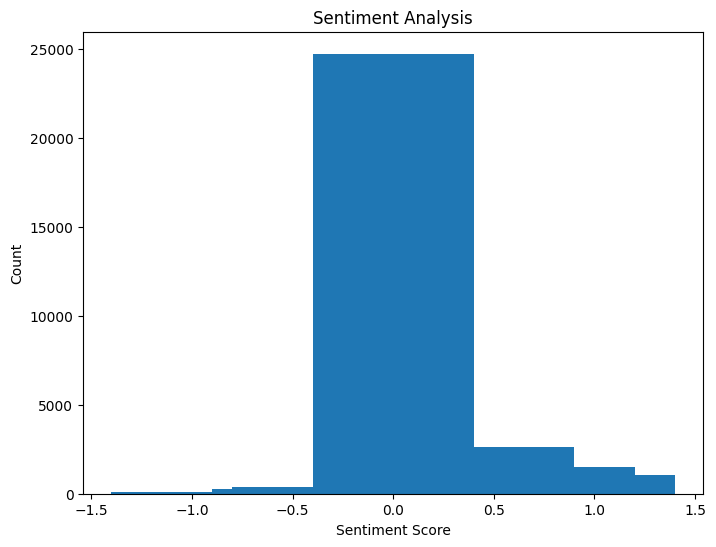

In [49]:
plt.figure(figsize=(8, 6))
plt.bar(df_selected['sentiment'].value_counts().index, df_selected['sentiment'].value_counts().values)
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()


 **HASHTAG ANALYSIS**

In [50]:
# Select the 'hashtags' column and drop missing values
hashtags = df['hashtags'].dropna()

In [51]:
 #Split the hashtags and convert to lowercase
hashtags = hashtags.str.lower().str.split(',')


In [52]:
# Flatten the list of hashtags
hashtags = [tag for sublist in hashtags if isinstance(sublist, list) for tag in sublist]


In [53]:
# Count the frequency of each hashtag
hashtag_counts = Counter(hashtags)

# Print the top 10 most common hashtags
top_hashtags = hashtag_counts.most_common(10)
for hashtag, count in top_hashtags:
    print(hashtag, count)

['cricket' 7802
 'cricket' 7320
 'cricket'] 6357
['cricket'] 5213
 'score' 1584
 'cricketscore'] 1581
 'ipl2021' 1569
 't20worldcup' 1034
 'ipl' 999
['engvind' 931


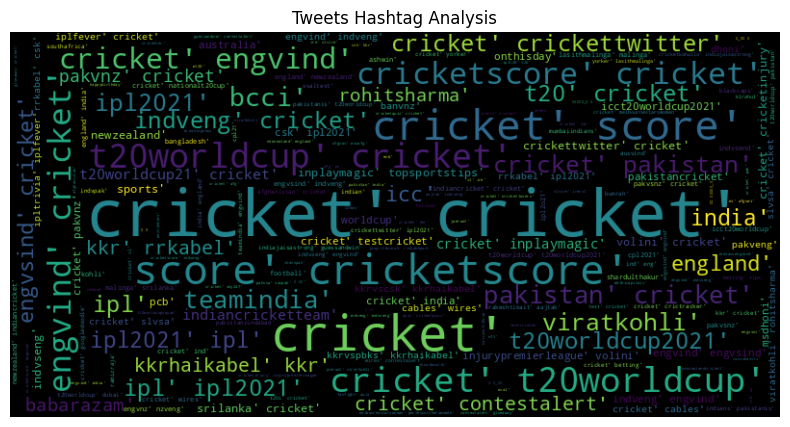

In [54]:
# Generate word cloud of hashtags
all_hashtags = ' '.join(hashtags)
wordcloud = WordCloud(width=800, height=400, background_color='BLACK').generate(all_hashtags)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tweets Hashtag Analysis')
plt.show()



# USER ENGAGEMENT ANALYSIS

In [55]:
# Calculate the average retweet and favorite counts
avg_retweet= df['retweets'].mean();
avg_favourite= df['favorites'].mean();
print("Averge Retweets Count : ", avg_retweet);
print("Averge Favourite Count : ", avg_favourite);

Averge Retweets Count :  2.005398943349659
Averge Favourite Count :  21.76562801280321


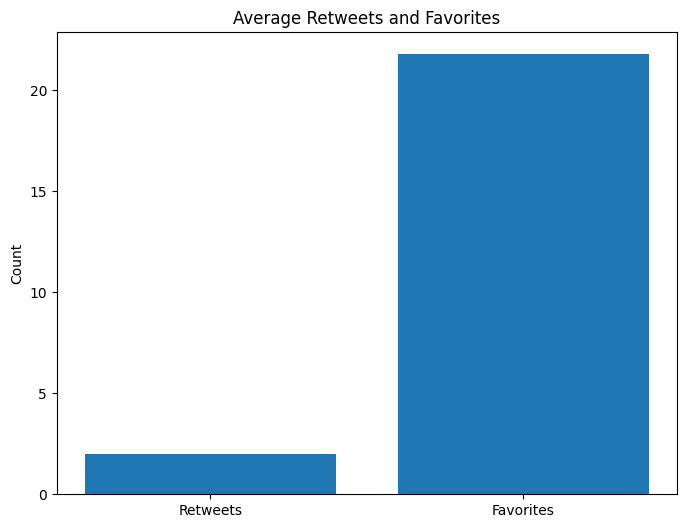

In [56]:
plt.figure(figsize=(8, 6))
plt.bar(['Retweets', 'Favorites'], [avg_retweet, avg_favourite])
plt.ylabel('Count')
plt.title('Average Retweets and Favorites')
plt.show()


<ipython-input-57-19ba6022bb40>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  engagement_data = df.groupby(pd.Grouper(key='date', freq='D')).sum()['retweets']


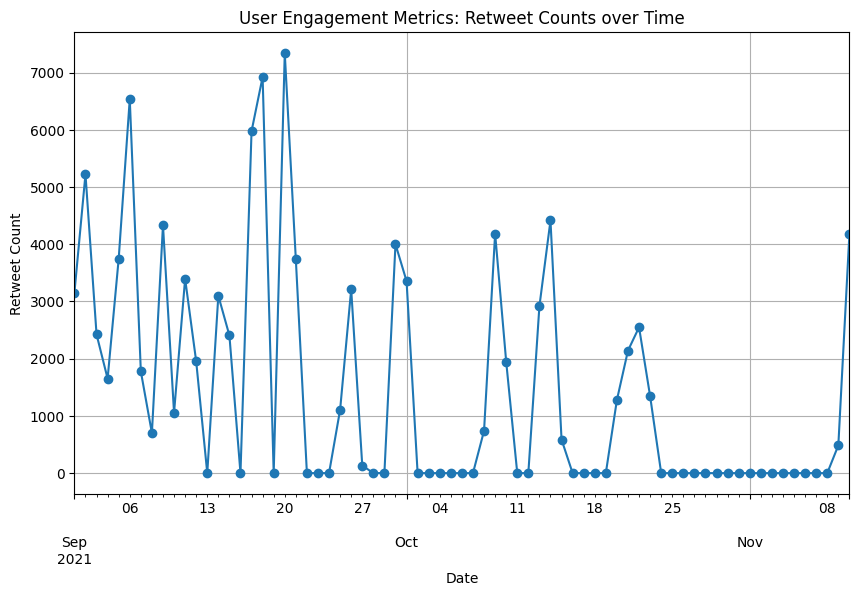

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed tweet data with user engagement metrics
#tweet_data = pd.read_csv('tweet_data.csv')  # Replace 'tweet_data.csv' with your file path

# Convert the timestamp column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group the data by timestamp and calculate the sum of retweet counts for each timestamp
engagement_data = df.groupby(pd.Grouper(key='date', freq='D')).sum()['retweets']

# Plot the user engagement metrics over time
plt.figure(figsize=(10, 6))
engagement_data.plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Retweet Count')
plt.title('User Engagement Metrics: Retweet Counts over Time')
plt.grid(True)
plt.show()


**USER LOCATION ANALYSIS**

In [58]:
# Extract the top 5 most common user locations
top_locations = df_selected['user_location'].value_counts().head(5)
print("Top 5 user locations:")
print(top_locations)

Top 5 user locations:
India               3156
Pakistan            1628
New Delhi, India    1252
Mumbai, India        865
Global               817
Name: user_location, dtype: int64


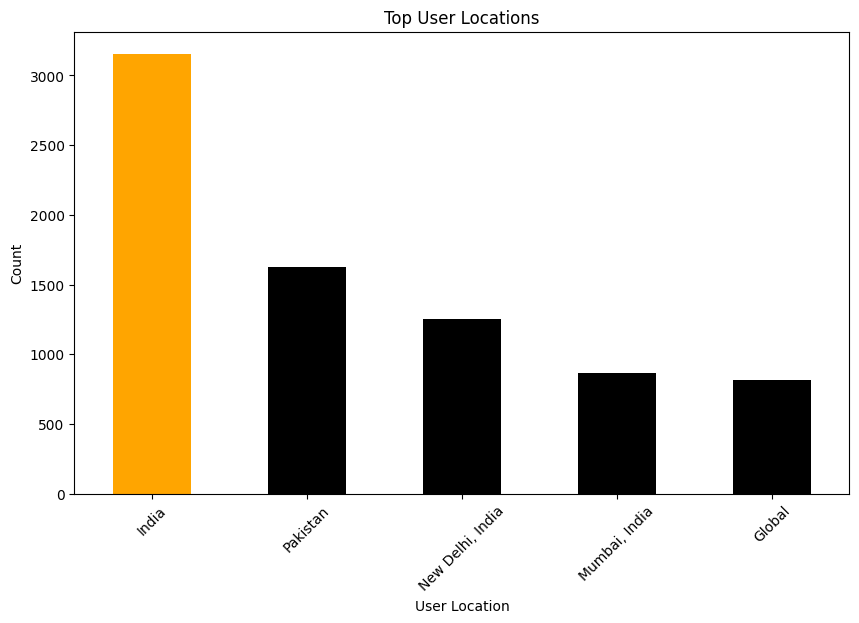

In [59]:
# Plot the top user locations
plt.figure(figsize=(10,6))
colors=['orange','black','black','black','black']
top_locations.plot(kind='bar', color= colors)
plt.xlabel('User Location')
plt.ylabel('Count')
plt.title('Top User Locations')
plt.xticks(rotation= 45)
plt.show()

**SOURCE ANALYSIS**

In [60]:
# Count the number of tweets from each source
SOURCE_COUNTS= df_selected['source'].value_counts()
print("Tweet source distribution:")
print(SOURCE_COUNTS)


Tweet source distribution:
Twitter for Android                 23392
Twitter Web App                     13032
Twitter for iPhone                   5688
Sachin T.                            2994
TweetDeck                            2051
                                    ...  
nextmedia Autoposter                    1
nextmedia InsideSport Autoposter        1
Twidere for Android                     1
92 News HD                              1
OnlyWire App                            1
Name: source, Length: 143, dtype: int64


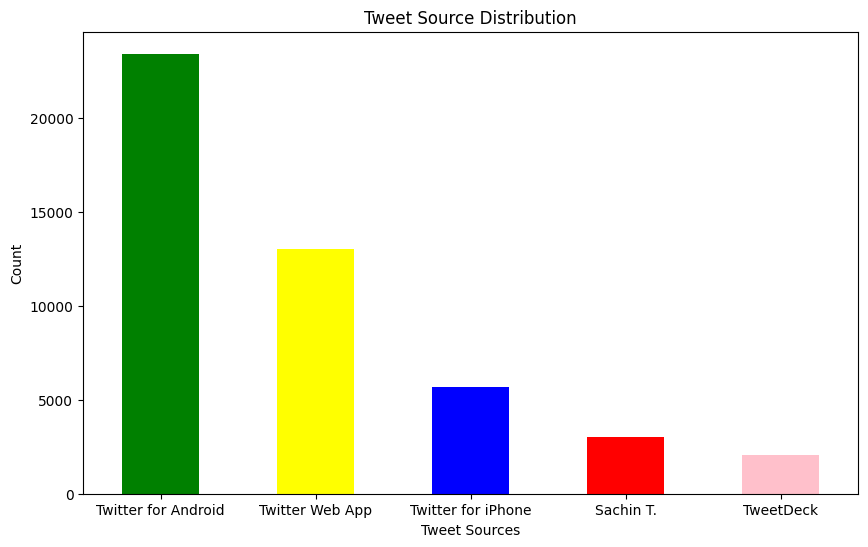

In [61]:
# Plot the top user locations
top_sources = SOURCE_COUNTS[:5]
plt.figure(figsize=(10,6))
colors=['green','yellow','blue','red','pink']
top_sources .plot(kind='bar', color= colors)
plt.xlabel('Tweet Sources')
plt.ylabel('Count')
plt.title('Tweet Source Distribution')
plt.xticks(rotation= 0)
plt.show()

# Training Model

**Using Random Forest Classification**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Prepare the data
X = df['id'].values.reshape(-1, 1)  # Reshape the user_info column to a 2D array
y = df['retweets'].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=43)

# Initialize the Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

Evaluate Accuracy

In [5]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.653179190751445


**Using** **Logistic** **Regression**

In [64]:
# Preprocess the tweets
preprocessed_tweets = [TextBlob(tweet).lower() for tweet in tweet]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_tweets, labels, test_size=0.001, random_state=42)

# Convert TextBlob objects back to strings
X_train_strings = [str(tweet.raw) for tweet in X_train]
X_test_strings = [str(tweet.raw) for tweet in X_test]

# Vectorize the tweets using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_strings)
X_test_vectorized = vectorizer.transform(X_test_strings)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Prediction and Accuracy

In [65]:
# Predict the labels for the test set
y_pred = model.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9807692307692307
